My first Machine Learning project

In [1]:
%pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 1.8 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 2.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=8b87b36ae2c6ae8288ee4fe7c871197231704ef93a0364751006f31189a9767e
  Stored in directory: c:\users\charis\appdata\local\pip\cache\wheels\a4\4c\13\c0145c208d813977081d42e2a47d72acb3efc4a6965ab57804
Successfully

[*********************100%***********************]  1 of 1 completed
c:\Users\Charis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Mean Squared Error: 83.40


ValueError: x and y must have same first dimension, but have shapes (30,) and (29, 1)

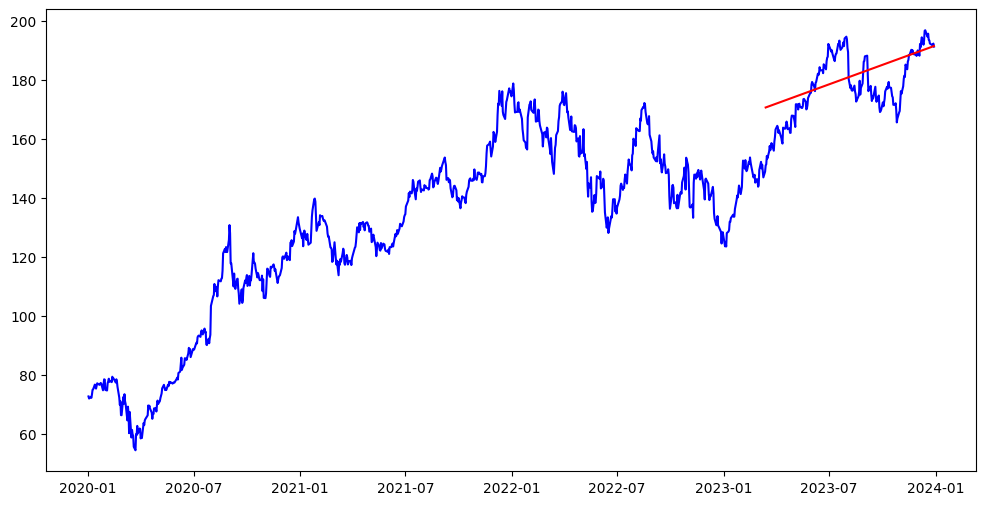

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load stock data
ticker = 'AAPL'
stock = yf.download(ticker, start="2020-01-01", end="2024-01-01")  # Adjusted end date to current valid range

# Prepare the data
stock['Date'] = stock.index
stock['Days'] = (stock['Date'] - stock['Date'].min()).dt.days
X = stock[['Days']]
y = stock['Close']

# Sequential split (first 80% for training, last 20% for testing)
split_idx = int(0.8 * len(stock))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Predict next 30 days
future_days = pd.DataFrame({'Days': np.arange(stock['Days'].max() + 1, stock['Days'].max() + 30)})
future_prices = model.predict(future_days)

# Predict future stock price 
future_dates = [stock['Date'].max() + pd.Timedelta(days=i) for i in range(1, 31)]

plt.figure(figsize=(12, 6))
plt.plot(stock['Date'], stock['Close'], label='Actual Prices', color='blue')
plt.plot(stock['Date'].iloc[split_idx:], y_pred, label='Predicted Prices (Test)', color='red')
plt.plot(future_dates, future_prices, label='Future Prediction', color='green', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.legend()
plt.show()